In [1]:
import sys
sys.path.append('../')

In [2]:
### Libraries
from pipelines.experimental_modeling_pipeline import DiabetesPreprocessing as DP
from pipelines.experimental_modeling_pipeline import AsthmaPreprocessing as AP
from pipelines.experimental_modeling_pipeline import ClusteringAnalysis as QA
from pipelines.experimental_modeling_pipeline import Experimental_modeling_pipeline as EMP
from pipelines.experimental_modeling_pipeline import CopdPreprocessing as COPDP
from pipelines.experimental_modeling_pipeline import ObesityPreprocessing as OP
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

dp = DP("C:/Users/keimp/")
ap = AP("C:/Users/keimp/")
copdp = COPDP("C:/Users/keimp/")
op = OP("C:/Users/keimp/")
emp = EMP()

In [375]:
df = op.pipeline()

C:\Users\keimp\NHS\Code\experimental_modeling\obesity\..\pipelines\experimental_modeling_pipeline.py:1397: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan
C:\Users\keimp\NHS\Code\experimental_modeling\obesity\..\pipelines\experimental_modeling_pipeline.py:1404: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


1


C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3318: DtypeWarning: Columns (12,24,37,42,75) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


2


C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3318: DtypeWarning: Columns (13,14,15,16,17,18,19,20,22,23,24,26,27,28,30,31,32,33,34,35,36,38,39,40,42,43,44,46,47,48,50,51,52,54,55,56,57,58,59,60,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


3


C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3318: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


4
5
6
7
8


## Difference first and third

In [94]:
def difference(l):
    if str(l[0]) != "nan" and str(l[1]) != "nan":
        return l[1] - l[0]
    return pd.np.nan

In [95]:
df["bmi_dif_0_2"] = df[['Body mass index (BMI) | Instance 0','Body mass index (BMI) | Instance 2']].apply(difference, axis=1)

C:\Users\keimp\AppData\Local\Temp\ipykernel_14148\1914222047.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


In [96]:
df["bmi_dif_0_2"].mean()

-0.013263974460034682

In [97]:
df["bmi_dif_0_2"].std()

2.1316281494743987

In [98]:
s = df["bmi_dif_0_2"].std() 

In [99]:
def sd_lab(i):
    if str(i) == "nan":
         return pd.np.nan
    if i> s:
        return 1
    return 0

In [100]:
df["std_lab"] = df["bmi_dif_0_2"].apply(sd_lab)

C:\Users\keimp\AppData\Local\Temp\ipykernel_14148\640616617.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


In [101]:
df["std_lab"].value_counts()

0.0    55917
1.0     7513
Name: std_lab, dtype: int64

In [392]:
#data prep
one_hot = pd.get_dummies(df['Usual walking pace | Instance 0'])
df = pd.concat([df, one_hot], axis=1)

### Modeling

In [103]:
datacolumns_selected =[
'Year of birth',
'Waist circumference | Instance 0',
'Weight | Instance 0',
'Body mass index (BMI) | Instance 0',
'Hip circumference | Instance 0',
'Standing height | Instance 0',
'Whole body fat mass | Instance 0',
'Body fat percentage | Instance 0',
#'Time spent using computer | Instance 0',
#'Time spent watching television (TV) | Instance 0',
'Summed MET minutes per week for all activity | Instance 0',
'Summed minutes activity | Instance 0',
'Diastolic blood pressure',
'Systolic blood pressure',
'C-reactive protein | Instance 0',
'Cholesterol_lowering_medication',
'Blood_pressure',
'Insulin',
'Glycated haemoglobin (HbA1c) | Instance 0',
'trigl_hdl_ratio_0',
'apob_apoa_ratio_0',
'Brisk pace',
'Slow pace',
'Steady average pace',
"Sex"
]

In [104]:
datacolumns_selected_lab = datacolumns_selected+["std_lab"]

In [105]:
cohort = pd.concat([df[(df["std_lab"] == 1)],
                    df[(df["std_lab"] == 0)].sample(
                    df[(df["std_lab"] == 1)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]

Number of missing values: 
 Year of birth                                                   0
Waist circumference | Instance 0                                0
Weight | Instance 0                                             0
Body mass index (BMI) | Instance 0                              0
Hip circumference | Instance 0                                  0
Standing height | Instance 0                                    0
Whole body fat mass | Instance 0                              206
Body fat percentage | Instance 0                              196
Summed MET minutes per week for all activity | Instance 0    2390
Summed minutes activity | Instance 0                         2390
Diastolic blood pressure                                     1003
Systolic blood pressure                                      1003
C-reactive protein | Instance 0                              1006
Cholesterol_lowering_medication                                 0
Blood_pressure                                  

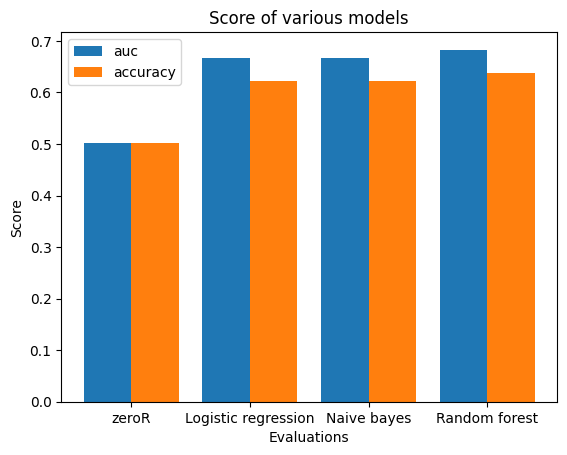

F1:  0.6201337036672875 0.5657264042495324 0.6273948467426241
auc:  [0.5028003804290394, 0.666580382274433, 0.6665521789898472, 0.6827742247027709]
accuracy:  [0.5028003804290394, 0.6225301516994289, 0.6224250018706953, 0.6380651314679988]


In [106]:
emp.pipeline(cohort, "std_lab", datacolumns_selected,0.25, splits=5)

## On weight  

In [145]:
df["weight_dif_0_2"] = df[['Weight | Instance 0','Weight | Instance 2']].apply(difference, axis=1)

C:\Users\keimp\AppData\Local\Temp\ipykernel_14148\1914222047.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


In [146]:
df["weight_dif_0_2"].mean()

-0.689764983854454

In [147]:
df["weight_dif_0_2"].std()

6.106276778857821

In [154]:
s = df["weight_dif_0_2"].std() *3

In [155]:
df["weight_std_lab"] = df["weight_dif_0_2"].apply(sd_lab)

C:\Users\keimp\AppData\Local\Temp\ipykernel_14148\640616617.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


In [156]:
df["weight_std_lab"].value_counts()

0.0    63093
1.0      392
Name: weight_std_lab, dtype: int64

In [157]:
datacolumns_selected_lab = datacolumns_selected+["weight_std_lab"]

In [158]:
cohort = pd.concat([df[(df["weight_std_lab"] == 1)],
                    df[(df["weight_std_lab"] == 0)].sample(
                    df[(df["weight_std_lab"] == 1)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]

Number of missing values: 
 Year of birth                                                  0
Waist circumference | Instance 0                               0
Weight | Instance 0                                            0
Body mass index (BMI) | Instance 0                             0
Hip circumference | Instance 0                                 0
Standing height | Instance 0                                   0
Whole body fat mass | Instance 0                              13
Body fat percentage | Instance 0                              12
Summed MET minutes per week for all activity | Instance 0    106
Summed minutes activity | Instance 0                         106
Diastolic blood pressure                                      50
Systolic blood pressure                                       50
C-reactive protein | Instance 0                               66
Cholesterol_lowering_medication                                0
Blood_pressure                                                

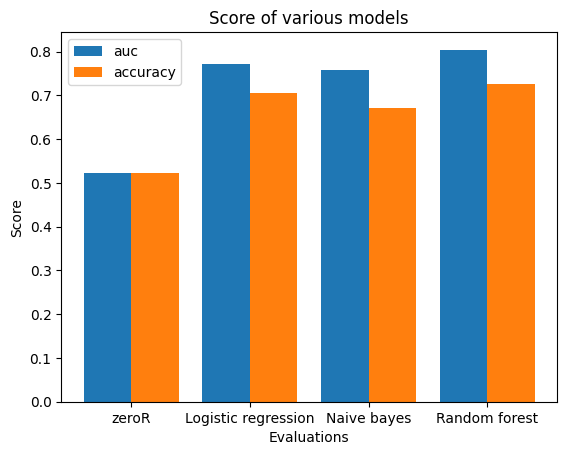

F1:  0.6774085194822985 0.5827383359537693 0.7006001009013204
auc:  [0.5220883534136547, 0.7705520321876704, 0.7582685488270594, 0.8042681055646481]
accuracy:  [0.5220883534136547, 0.7047676767676768, 0.6707272727272727, 0.7248686868686869]


In [159]:
emp.pipeline(cohort, "weight_std_lab", datacolumns_selected,0.25, splits=5)

#### Percentages

In [116]:
def perc_weight(l):
    if str(l[0]) != "nan" and str(l[1]) != "nan":
        return (l[1] - l[0]) / l[0] *100
    return pd.np.nan

In [117]:
df["weight_difperc_0_2"] = df[['Weight | Instance 0','Weight | Instance 2']].apply(perc_weight, axis=1)

C:\Users\keimp\AppData\Local\Temp\ipykernel_14148\4213814191.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


In [118]:
df["weight_difperc_0_2"].mean()

-0.7362862195277111

In [298]:
df["weight_difperc_0_2"].std()

7.588000462380384

In [299]:
s =7.58 

In [300]:
df["weight_prec_std_lab"] = df["weight_difperc_0_2"].apply(sd_lab)

C:\Users\keimp\AppData\Local\Temp\ipykernel_14148\640616617.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


In [214]:
df["weight_prec_std_lab"].value_counts()

0.0    56385
1.0     7100
Name: weight_prec_std_lab, dtype: int64

In [178]:
datacolumns_selected_lab = datacolumns_selected+["weight_prec_std_lab"]

In [143]:
cohort = pd.concat([df[(df["weight_prec_std_lab"] == 1)],
                    df[(df["weight_prec_std_lab"] == 0)].sample(
                    df[(df["weight_prec_std_lab"] == 1)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]

Number of missing values: 
 Year of birth                                                  0
Waist circumference | Instance 0                               0
Weight | Instance 0                                            0
Body mass index (BMI) | Instance 0                             0
Hip circumference | Instance 0                                 0
Standing height | Instance 0                                   0
Whole body fat mass | Instance 0                              10
Body fat percentage | Instance 0                               9
Summed MET minutes per week for all activity | Instance 0    147
Summed minutes activity | Instance 0                         147
Diastolic blood pressure                                      71
Systolic blood pressure                                       71
C-reactive protein | Instance 0                               73
Cholesterol_lowering_medication                                0
Blood_pressure                                                

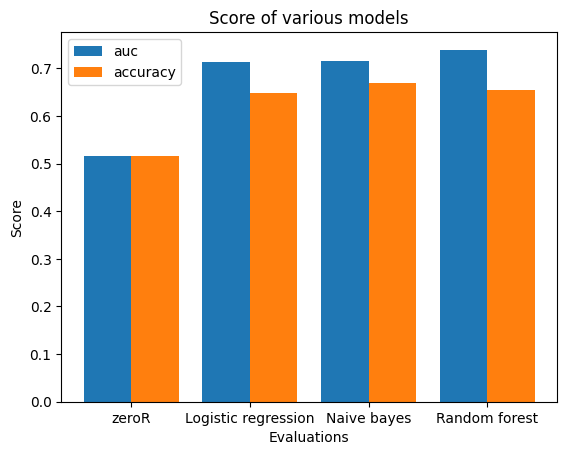

F1:  0.6497244613034087 0.67593696689004 0.6409764700542963
auc:  [0.515426497277677, 0.7125181708639173, 0.7163445169527592, 0.7392760815385774]
accuracy:  [0.515426497277677, 0.6479115479115479, 0.6697133497133497, 0.6552334152334153]


In [144]:
emp.pipeline(cohort, "weight_prec_std_lab", datacolumns_selected,0.25, splits=5)

## PCA

In [190]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix

#### Weight change

In [273]:
t = df[datacolumns_selected_lab].dropna()

In [274]:
pca = PCA(n_components=len(datacolumns_selected))

In [275]:
pca.fit(t[datacolumns_selected])

PCA(n_components=23)

In [276]:
print(pca.explained_variance_ratio_)

[9.99574966e-01 2.26860786e-04 9.13633255e-05 5.10558892e-05
 2.53150914e-05 1.02611230e-05 5.27246602e-06 4.50608600e-06
 3.64802947e-06 2.13703542e-06 1.91539674e-06 1.77502557e-06
 6.50823491e-07 1.22706888e-07 7.45926824e-08 2.64878669e-08
 2.23115102e-08 1.04670259e-08 6.48931776e-09 5.15602806e-09
 3.89380297e-09 6.55698557e-10 5.78929942e-11]


In [277]:
print(pca.singular_values_)

[4.95938072e+05 7.47135685e+03 4.74139037e+03 3.54439966e+03
 2.49579847e+03 1.58897554e+03 1.13900770e+03 1.05297850e+03
 9.47433927e+02 7.25146280e+02 6.86513585e+02 6.60879180e+02
 4.00176308e+02 1.73761771e+02 1.35477719e+02 8.07315436e+01
 7.40942058e+01 5.07494585e+01 3.99594299e+01 3.56186455e+01
 3.09532852e+01 1.27019932e+01 3.77426830e+00]


In [278]:
t["weight_prec_std_lab"].value_counts()

0.0    36315
1.0     4444
Name: weight_prec_std_lab, dtype: int64

In [279]:
l = ["pca"+ str(i)for i in range(1,24)]

In [280]:
t[l] = pca.transform(t[datacolumns_selected])

In [281]:
t = pd.concat([t[(t["weight_prec_std_lab"] == 1)],
                t[(t["weight_prec_std_lab"] == 0)].sample(
                t[(t["weight_prec_std_lab"] == 1)].shape[0]
                )])

Number of missing values: 
 Year of birth                                                0
Waist circumference | Instance 0                             0
Weight | Instance 0                                          0
Body mass index (BMI) | Instance 0                           0
Hip circumference | Instance 0                               0
Standing height | Instance 0                                 0
Whole body fat mass | Instance 0                             0
Body fat percentage | Instance 0                             0
Summed MET minutes per week for all activity | Instance 0    0
Summed minutes activity | Instance 0                         0
Diastolic blood pressure                                     0
Systolic blood pressure                                      0
C-reactive protein | Instance 0                              0
Cholesterol_lowering_medication                              0
Blood_pressure                                               0
Insulin                    

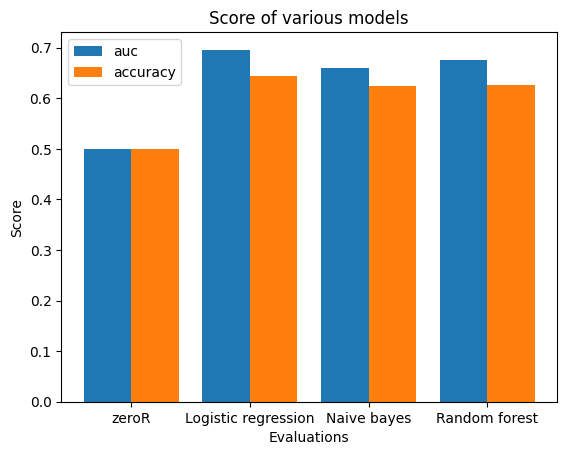

F1:  0.6450601382715583 0.62054314795155 0.618758634361735
auc:  [0.5, 0.6958767027848451, 0.6607108289138439, 0.6747211016071232]
accuracy:  [0.5, 0.6433403196575667, 0.6236510391181406, 0.6254503077379818]


In [282]:
emp.pipeline(t, "weight_prec_std_lab", l,0.25, splits=5)

#### set point

In [284]:
from scipy import stats

In [316]:
datacolumns_selected =[
'Year of birth',
'Waist circumference | Instance 0',
'Weight | Instance 0',
'Body mass index (BMI) | Instance 0',
'Hip circumference | Instance 0',
'Standing height | Instance 0',
'Whole body fat mass | Instance 0',
'Body fat percentage | Instance 0',
"Basal metabolic rate | Instance 0",
#'Time spent using computer | Instance 0',
#'Time spent watching television (TV) | Instance 0',
'Summed MET minutes per week for all activity | Instance 0',
'Summed minutes activity | Instance 0',
'Diastolic blood pressure',
'Systolic blood pressure',
'C-reactive protein | Instance 0',
'Cholesterol_lowering_medication',
'Blood_pressure',
'Insulin',
'Glycated haemoglobin (HbA1c) | Instance 0',
'trigl_hdl_ratio_0',
'apob_apoa_ratio_0',
'Brisk pace',
'Slow pace',
'Steady average pace',
"Sex",
'Weight | Instance 2'
]

In [317]:
t = df[(df["Sex"] == 1)]
t = t[datacolumns_selected].dropna()
slope, intercept, r, p, std_err = stats.linregress(t['Weight | Instance 0'],t['Basal metabolic rate | Instance 0'])

def linear_func(x):
    return slope * x +intercept

model = list(map(linear_func, t['Weight | Instance 0']))

t["pred"] = t['Weight | Instance 0'].apply(linear_func)
t["distance"] = t["Basal metabolic rate | Instance 0"] - t["pred"]

In [335]:
tdatacolumns_selected =[
'Year of birth',
'Waist circumference | Instance 0',
'Weight | Instance 0',
'Body mass index (BMI) | Instance 0',
'Hip circumference | Instance 0',
'Standing height | Instance 0',
'Whole body fat mass | Instance 0',
'Body fat percentage | Instance 0',
#'Time spent using computer | Instance 0',
#'Time spent watching television (TV) | Instance 0',
'Summed MET minutes per week for all activity | Instance 0',
'Summed minutes activity | Instance 0',
'Diastolic blood pressure',
'Systolic blood pressure',
'C-reactive protein | Instance 0',
'Cholesterol_lowering_medication',
'Blood_pressure',
'Insulin',
'Glycated haemoglobin (HbA1c) | Instance 0',
'trigl_hdl_ratio_0',
'apob_apoa_ratio_0',
'Brisk pace',
'Slow pace',
'Steady average pace',
"Sex",
"distance"
]

In [336]:
t["weight_difperc_0_2"] = t[['Weight | Instance 0','Weight | Instance 2']].apply(perc_weight, axis=1)

In [337]:
tdatacolumns_selected_lab = tdatacolumns_selected+["weight_prec_std_lab"]

In [338]:
t["weight_prec_std_lab"] = t["weight_difperc_0_2"].apply(sd_lab)

In [339]:
cohort = pd.concat([t[(t["weight_prec_std_lab"] == 1)],
                    t[(t["weight_prec_std_lab"] == 0)].sample(
                    t[(t["weight_prec_std_lab"] == 1)].shape[0]
                    )])
cohort = cohort[tdatacolumns_selected_lab]

Number of missing values: 
 Year of birth                                                0
Waist circumference | Instance 0                             0
Weight | Instance 0                                          0
Body mass index (BMI) | Instance 0                           0
Hip circumference | Instance 0                               0
Standing height | Instance 0                                 0
Whole body fat mass | Instance 0                             0
Body fat percentage | Instance 0                             0
Summed MET minutes per week for all activity | Instance 0    0
Summed minutes activity | Instance 0                         0
Diastolic blood pressure                                     0
Systolic blood pressure                                      0
C-reactive protein | Instance 0                              0
Cholesterol_lowering_medication                              0
Blood_pressure                                               0
Insulin                    

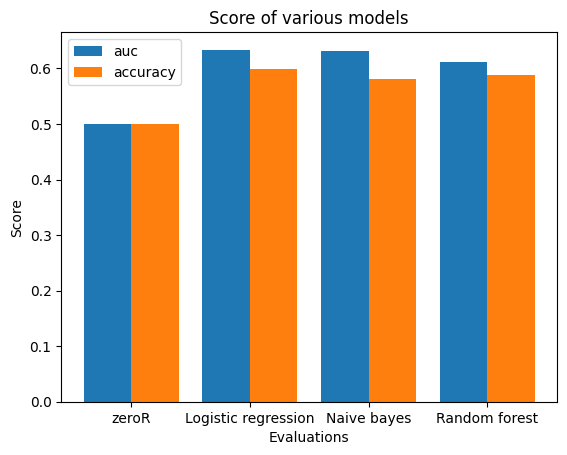

F1:  0.5903940388112588 0.5014757507473575 0.5879639104287305
auc:  [0.5, 0.6337439420069968, 0.6313957988819092, 0.6122630839232145]
accuracy:  [0.5, 0.5991482033140942, 0.5811436417799293, 0.5887707130888102]


In [340]:
emp.pipeline(cohort, "weight_prec_std_lab", tdatacolumns_selected,0.25, splits=5)

## Adding more data

In [376]:
df.shape

(502364, 312)

In [377]:
df['Time spent using computer | Instance 0'] = df['Time spent using computer | Instance 0'].replace("Less than an hour a day", 0.5)
df['Time spent using computer | Instance 0'] = df['Time spent using computer | Instance 0'].replace("Do not know", pd.np.nan)
df['Time spent using computer | Instance 0'] = df['Time spent using computer | Instance 0'].replace("Prefer not to answer", pd.np.nan)

C:\Users\keimp\AppData\Local\Temp\ipykernel_14148\1475605673.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Time spent using computer | Instance 0'] = df['Time spent using computer | Instance 0'].replace("Do not know", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_14148\1475605673.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Time spent using computer | Instance 0'] = df['Time spent using computer | Instance 0'].replace("Prefer not to answer", pd.np.nan)


In [378]:
df['Time spent watching television (TV) | Instance 0'] = df['Time spent watching television (TV) | Instance 0'].replace("Less than an hour a day", 0.5)
df['Time spent watching television (TV) | Instance 0'] = df['Time spent watching television (TV) | Instance 0'].replace("Do not know", pd.np.nan)
df['Time spent watching television (TV) | Instance 0'] = df['Time spent watching television (TV) | Instance 0'].replace("Prefer not to answer", pd.np.nan)

C:\Users\keimp\AppData\Local\Temp\ipykernel_14148\682370225.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Time spent watching television (TV) | Instance 0'] = df['Time spent watching television (TV) | Instance 0'].replace("Do not know", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_14148\682370225.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Time spent watching television (TV) | Instance 0'] = df['Time spent watching television (TV) | Instance 0'].replace("Prefer not to answer", pd.np.nan)


In [379]:
df['Duration of moderate activity | Instance 0'] = df['Duration of moderate activity | Instance 0'].replace("Do not know", pd.np.nan)
df['Duration of moderate activity | Instance 0'] = df['Duration of moderate activity | Instance 0'].replace("Prefer not to answer", pd.np.nan)

C:\Users\keimp\AppData\Local\Temp\ipykernel_14148\2184150623.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Duration of moderate activity | Instance 0'] = df['Duration of moderate activity | Instance 0'].replace("Do not know", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_14148\2184150623.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Duration of moderate activity | Instance 0'] = df['Duration of moderate activity | Instance 0'].replace("Prefer not to answer", pd.np.nan)


In [380]:
df['Duration of vigorous activity | Instance 0'] = df['Duration of vigorous activity | Instance 0'].replace("Do not know", pd.np.nan)
df['Duration of vigorous activity | Instance 0'] = df['Duration of vigorous activity | Instance 0'].replace("Prefer not to answer", pd.np.nan)

C:\Users\keimp\AppData\Local\Temp\ipykernel_14148\1102098838.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Duration of vigorous activity | Instance 0'] = df['Duration of vigorous activity | Instance 0'].replace("Do not know", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_14148\1102098838.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Duration of vigorous activity | Instance 0'] = df['Duration of vigorous activity | Instance 0'].replace("Prefer not to answer", pd.np.nan)


In [381]:
one_hot = pd.get_dummies(df['IPAQ activity group | Instance 0'])
df = pd.concat([df, one_hot], axis=1)

In [382]:
one_hot = pd.get_dummies(df['Duration of strenuous sports | Instance 0'])
df = pd.concat([df, one_hot], axis=1)

In [383]:
one_hot = pd.get_dummies(df['Alcohol intake frequency. | Instance 0'])
df = pd.concat([df, one_hot], axis=1)

In [384]:
df['Sleep duration | Instance 0'] = df['Sleep duration | Instance 0'].replace("Do not know", pd.np.nan)
df['Sleep duration | Instance 0'] = df['Sleep duration | Instance 0'].replace("Prefer not to answer", pd.np.nan)

C:\Users\keimp\AppData\Local\Temp\ipykernel_14148\1023793530.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Sleep duration | Instance 0'] = df['Sleep duration | Instance 0'].replace("Do not know", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_14148\1023793530.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Sleep duration | Instance 0'] = df['Sleep duration | Instance 0'].replace("Prefer not to answer", pd.np.nan)


### Revisiting modeling

In [ ]:
datacolumns_selected =[
'Year of birth',
'Waist circumference | Instance 0',
'Weight | Instance 0',
'Body mass index (BMI) | Instance 0',
'Hip circumference | Instance 0',
'Standing height | Instance 0',
'Whole body fat mass | Instance 0',
'Body fat percentage | Instance 0',
'Time spent using computer | Instance 0',
'Time spent watching television (TV) | Instance 0',
'Summed MET minutes per week for all activity | Instance 0',
'Summed minutes activity | Instance 0',
'Diastolic blood pressure',
'Systolic blood pressure',
'C-reactive protein | Instance 0',
'Cholesterol_lowering_medication',
'Blood_pressure',
'Insulin',
'Glycated haemoglobin (HbA1c) | Instance 0',
'trigl_hdl_ratio_0',
'apob_apoa_ratio_0',
'Brisk pace',
'Slow pace',
'Steady average pace',
"Sex",
'Duration of moderate activity | Instance 0',
'Duration of vigorous activity | Instance 0',
'Sleep duration | Instance 0',
'high',
 'low',
 'moderate',
 'Between 1 and 1.5 hours',
 'Between 1.5 and 2 hours',
 'Between 15 and 30 minutes',
 'Between 2 and 3 hours',
 'Between 30 minutes and 1 hour',
 'Less than 15 minutes',
 'Over 3 hours',
 'Prefer not to answer',
 'Daily or almost daily',
 'Never',
 'Once or twice a week',
 'One to three times a month',
 'Special occasions only',
 'Three or four times a week'
]

In [395]:
datacolumns_selected =[
'Year of birth',
'Brisk pace',
'Slow pace',
'Steady average pace',
"Sex",
'high',
 'low',
 'moderate'
]

In [396]:
df["weight_difperc_0_2"] = df[['Weight | Instance 0','Weight | Instance 2']].apply(perc_weight, axis=1)

C:\Users\keimp\AppData\Local\Temp\ipykernel_14148\4213814191.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


In [397]:
s = df["weight_difperc_0_2"].std()

In [398]:
df["weight_prec_std_lab"] = df["weight_difperc_0_2"].apply(sd_lab)

C:\Users\keimp\AppData\Local\Temp\ipykernel_14148\640616617.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


In [399]:
df["weight_prec_std_lab"].value_counts()

0.0    56394
1.0     7091
Name: weight_prec_std_lab, dtype: int64

In [400]:
datacolumns_selected_lab = datacolumns_selected+["weight_prec_std_lab"]

In [401]:
cohort = pd.concat([df[(df["weight_prec_std_lab"] == 1)],
                    df[(df["weight_prec_std_lab"] == 0)].sample(
                    df[(df["weight_prec_std_lab"] == 1)].shape[0]
                    )])
cohort = cohort[datacolumns_selected_lab]

Number of missing values: 
 Year of birth          0
Brisk pace             0
Slow pace              0
Steady average pace    0
Sex                    0
high                   0
low                    0
moderate               0
weight_prec_std_lab    0
dtype: int64
Dataframe dimensions:  (14182, 9)


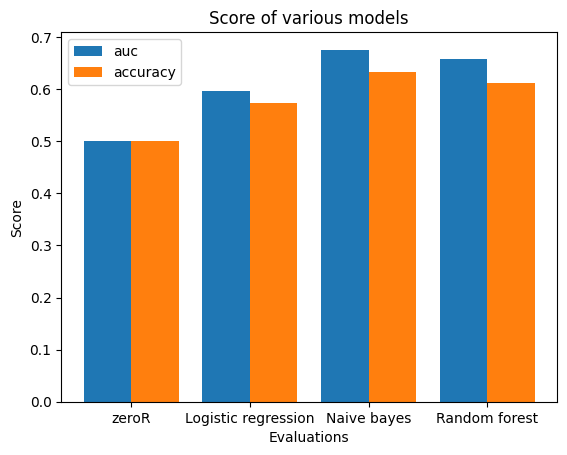

F1:  0.6027396842888149 0.6315057512891705 0.6079448685468443
auc:  [0.5, 0.5972024293265935, 0.6759378843831764, 0.6580360255946796]
accuracy:  [0.5, 0.5738269432787471, 0.6335495887757634, 0.6126777029113075]


In [402]:
emp.pipeline(cohort, "weight_prec_std_lab", datacolumns_selected,0.25, splits=5)

In [363]:
df.columns.tolist()

['Participant ID',
 'Waist circumference | Instance 0',
 'Waist circumference | Instance 1',
 'Waist circumference | Instance 2',
 'Waist circumference | Instance 3',
 'Weight | Instance 0',
 'Weight | Instance 1',
 'Weight | Instance 2',
 'Weight | Instance 3',
 'Body mass index (BMI) | Instance 0',
 'Body mass index (BMI) | Instance 1',
 'Body mass index (BMI) | Instance 2',
 'Body mass index (BMI) | Instance 3',
 'Hip circumference | Instance 0',
 'Hip circumference | Instance 1',
 'Hip circumference | Instance 2',
 'Hip circumference | Instance 3',
 'Standing height | Instance 0',
 'Standing height | Instance 1',
 'Standing height | Instance 2',
 'Standing height | Instance 3',
 'Whole body fat mass | Instance 0',
 'Whole body fat mass | Instance 1',
 'Whole body fat mass | Instance 2',
 'Whole body fat mass | Instance 3',
 'Body fat percentage | Instance 0',
 'Body fat percentage | Instance 1',
 'Body fat percentage | Instance 2',
 'Body fat percentage | Instance 3',
 'Basal metab